## DATA 606 - Capstone Project

### ChequeChecker - Handwritten Text Recognition

#### Data Source: http://www.fki.inf.unibe.ch/databases/iam-handwriting-database/iam-handwriting-database#icdar02

In [1]:
# Importing all the required libraries

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch import optim
from torchvision import transforms
from torch.autograd import Variable

from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets

from tqdm.autonotebook import tqdm

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import random
random.seed(123)


import cv2
from torch.autograd import Variable

from PIL import Image
import pandas as pd
import os
import glob
import pickle

from sklearn.metrics import accuracy_score

import time

### Loading Dataset

In [4]:
# Getting current working directory to get back to this directory easily
cwd=os.getcwd()
images_path='C:\\Users\\jimev\\Desktop\\Project_Data\\Words\\'

In [5]:
cwd

'C:\\Users\\jimev\\Desktop\\Project'

In [6]:
# Specify transforms using torchvision.transforms as transforms
# library
transformations = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

### Transformations

#### Transforming the images to a 128x128 images to bring uniformity between all the pictures

In [8]:
train_set = datasets.ImageFolder(images_path, transform = transformations)

In [9]:
train_set

Dataset ImageFolder
    Number of datapoints: 115320
    Root location: C:\Users\jimev\Desktop\Project_Data\Words\
    StandardTransform
Transform: Compose(
               Resize(size=128, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(128, 128))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [11]:
dataloader = torch.utils.data.DataLoader(train_set,
                                         batch_size= 32,
                                         shuffle=True)

In [12]:
dataloader

### Sample Pictures

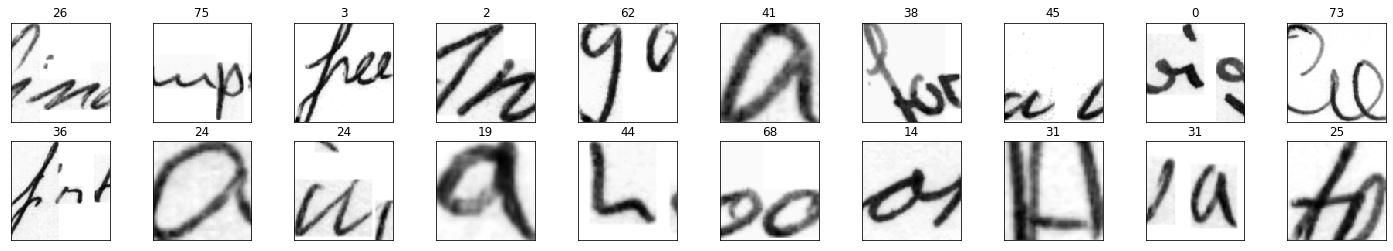

In [13]:
dataiter = iter(dataloader)
images, labels = dataiter.next()
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx][0], cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

#### Note: The above labels are the names of the file. We have to now code to club the images with its labels